In [1]:
%matplotlib inline

import cv2
from skimage.segmentation import slic
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from square import get_corners,get_slice
import time

In [21]:
rgb = io.imread('roboview2.jpg')
lab = cv2.cvtColor(rgb,cv2.COLOR_RGB2LAB)


(480, 640, 3)

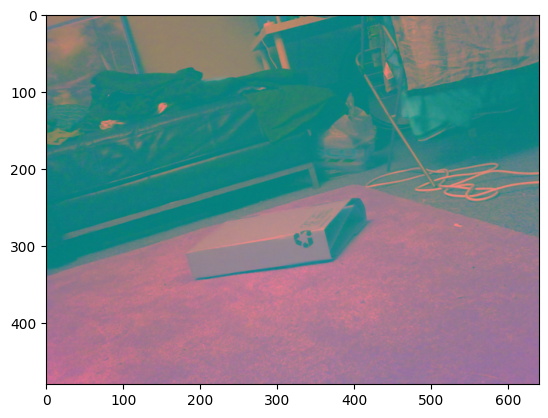

In [22]:
plt.imshow(lab)
lab.shape

In [23]:
def resize(image):
  (height,width,_) = image.shape
  return cv2.resize(image,(width//5,height//5),interpolation= cv2.INTER_LINEAR)

lab_small = resize(lab)
rgb_small = resize(rgb)

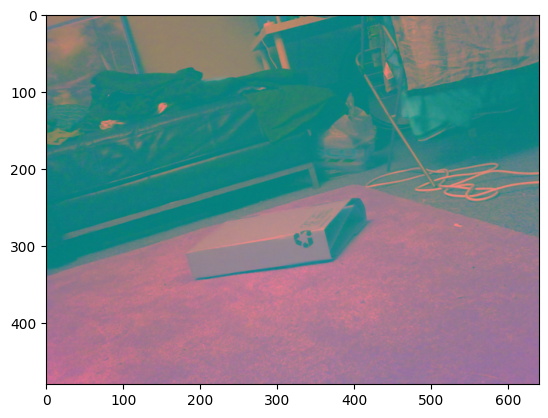

In [24]:
plt.imshow(lab)

In [25]:
segments_slic = slic(lab_small, n_segments=100, compactness=10, sigma=1,
                     start_label=0)

segments_slic

array([[ 0,  0,  0, ..., 11, 11, 11],
       [ 0,  0,  0, ..., 11, 11, 11],
       [ 0,  0,  0, ..., 11, 11, 11],
       ...,
       [88, 88, 88, ..., 87, 87, 87],
       [88, 88, 88, ..., 87, 87, 87],
       [88, 88, 88, ..., 87, 87, 87]], dtype=int64)

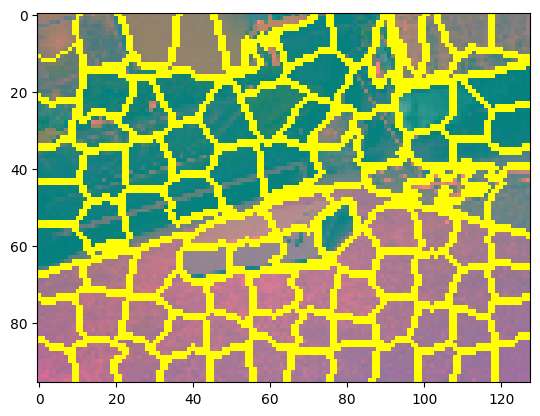

In [26]:
plt.imshow(mark_boundaries(lab_small,segments_slic))

In [27]:
#segments_slic = segments_slic.astype('float64')
all_labels = np.unique(segments_slic)
all_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], dtype=int64)

In [28]:
def normalise(image_3_channels):
  (width,height,_) = image_3_channels.shape
  reshaped = image_3_channels.reshape((width*height),3)
  return image_3_channels/reshaped.max(axis=0)

lab_small = normalise(lab_small)
lab_small.shape

(96, 128, 3)

In [29]:
print(lab_small.dtype)

def mean(label):
    return lab_small[segments_slic==label].mean(axis=0)

means = np.array([mean(label) for label in all_labels])
print(means)

print(means.shape)
means.max()


float64
[[0.58647378 0.78754709 0.67535129]
 [0.37944312 0.77320518 0.72535914]
 [0.58300133 0.80651233 0.63556999]
 [0.5037805  0.81230448 0.66112704]
 [0.46390101 0.81675375 0.68811413]
 [0.07533775 0.79694578 0.76288937]
 [0.10818697 0.79774298 0.74086184]
 [0.35649559 0.81506516 0.72934174]
 [0.64207815 0.81429199 0.69570707]
 [0.51798645 0.79861269 0.70789885]
 [0.51635976 0.78950457 0.72698725]
 [0.49406012 0.78272163 0.73739177]
 [0.19103586 0.80807453 0.70674603]
 [0.40384448 0.77005032 0.6969934 ]
 [0.37759243 0.79201254 0.72346462]
 [0.05518571 0.80020036 0.7422043 ]
 [0.14874767 0.80358772 0.74354812]
 [0.03668086 0.80706789 0.75853859]
 [0.1014299  0.79605207 0.71485649]
 [0.09978507 0.80185518 0.72583803]
 [0.1586939  0.79854928 0.7224026 ]
 [0.05693258 0.82053957 0.76622137]
 [0.10080389 0.80278584 0.74580868]
 [0.1313541  0.81112026 0.67247562]
 [0.12212127 0.8815331  0.79674797]
 [0.25330454 0.8154641  0.69954384]
 [0.05821375 0.80407646 0.73693944]
 [0.04638836 0.79967

0.9369170348551793

In [30]:
def sd(label):
    return lab_small[segments_slic==label].std(axis=0)

sds = np.array([sd(label) for label in all_labels])
print(sds.shape)
sds.max()

(97, 3)


0.2308149433408591

In [31]:
# def aspectRatio(label):
#     (height,width) =  np.where(segments_slic==label)
#     minHeight = (height.min(),width[np.argmin(height)])
#     maxHeight = (height.max(),width[np.argmax(height)])
#     minWidth = (width.min(),height[np.argmin(width)])
#     maxWidth = (height.max(),height[np.argmax(width)])

# sds = np.array([sd(label) for label in all_labels]).astype('uint8')
# print(sds.shape)
# sds.max()

def aspectRatio(segments,label):
    #consider converting original segments
  mask = np.zeros((segments.shape))
  mask[segments==label]=255
  contours,_=cv2.findContours(mask.astype('uint8'), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  x,y,w,h = cv2.boundingRect(contours[0])
  aspect_ratio = float(w)/h
  return aspect_ratio

aspect_ratios = np.array([aspectRatio(segments_slic,label) for label in all_labels])


print(aspect_ratios)


[0.84615385 0.9375     1.14285714 2.41176471 1.73333333 1.14285714
 1.         0.8        0.5625     0.89473684 1.27272727 0.83333333
 1.1875     0.8        3.         1.28571429 1.2        1.38461538
 1.15384615 1.21428571 0.875      0.8125     0.94117647 1.125
 1.07142857 0.84615385 1.23076923 0.91666667 1.45454545 1.1
 0.93333333 1.         1.11764706 1.2        0.92857143 1.18181818
 1.13333333 2.         1.42105263 0.92857143 1.66666667 1.0625
 0.66666667 1.83333333 1.23076923 1.27272727 1.76923077 1.94117647
 1.53846154 1.         0.71428571 1.25       1.         2.3
 0.85714286 1.25       1.76923077 1.         1.58333333 1.
 1.66666667 1.4        1.27272727 1.         0.8        1.3
 1.         1.1        0.92307692 1.25       0.85714286 1.08333333
 1.07692308 1.         0.86666667 0.92857143 0.92307692 0.91666667
 1.27272727 1.08333333 1.08333333 0.90909091 1.09090909 1.16666667
 1.5        1.08333333 1.         0.75       0.90909091 1.27272727
 1.09090909 1.3        1.1       

In [32]:
segment_statistics = np.concatenate((means,sds),axis=1)
segment_statistics.shape
#segment_statistics = segment_statistics/segment_statistics.max(axis=0)

(97, 6)

In [33]:
def get_roi(image,segments,top_left,bottom_right):
  (top_left,top_right) = get_corners(image,top_left,bottom_right)
  roi_slice = get_slice(segments,top_left,top_right).copy()
  labels = np.unique(roi_slice)
  return labels

def get_contour_for_label(label,image,segments):
  mask = np.zeros((segments.shape))
  mask[segments==label]=255
  contours,_=cv2.findContours(mask.astype('uint8'), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  return contours[0]

def get_pixels_for_label(label,image,segments):
  return image[segments==label,:]

print(get_pixels_for_label(71,lab_small,segments_slic).shape)


def getPixelsForLabels(labels,image,segments):
  return image[np.isin(segments,labels)]


roi_labels = get_roi(lab_small,segments_slic,(45,90),(65,99))

roi_pixels = getPixelsForLabels(roi_labels,lab_small,segments_slic)
roi_mean = roi_pixels.mean(axis=0)
roi_sd = roi_pixels.std(axis=0)
roi_statistics = np.array((roi_mean,roi_sd)).reshape(6)
print(roi_statistics)
roi_statistics = roi_statistics/roi_statistics.max(axis=0)
print(roi_statistics)



(120, 3)
[0.68303788 0.75021101 0.89158163 0.04785606 0.00984197 0.02243558]
[0.76609685 0.84143838 1.         0.05367546 0.01103878 0.02516379]


In [34]:
#simplified = np.take(means,segments_slic,axis=0)

#simplified.shape

In [35]:
#plt.imshow(simplified)

In [36]:
#ssd = np.sum((means-roi_mean)**2+(sds-roi_sd)**2,axis=1)

parameters = np.array([1,1,1,1,1,1])

sd = (segment_statistics-roi_statistics)**2
ssd = np.sum(sd,axis=1)

ssd = ssd/ssd.max()



print(ssd.shape)

ssd.max()

(97,)


1.0

In [37]:
ssd_image = np.take(ssd,segments_slic)

ssd_image

array([[0.2388651 , 0.2388651 , 0.2388651 , ..., 0.24689894, 0.24689894,
        0.24689894],
       [0.2388651 , 0.2388651 , 0.2388651 , ..., 0.24689894, 0.24689894,
        0.24689894],
       [0.2388651 , 0.2388651 , 0.2388651 , ..., 0.24689894, 0.24689894,
        0.24689894],
       ...,
       [0.06864464, 0.06864464, 0.06864464, ..., 0.07465489, 0.07465489,
        0.07465489],
       [0.06864464, 0.06864464, 0.06864464, ..., 0.07465489, 0.07465489,
        0.07465489],
       [0.06864464, 0.06864464, 0.06864464, ..., 0.07465489, 0.07465489,
        0.07465489]])

In [38]:
ssd_image.shape

(96, 128)

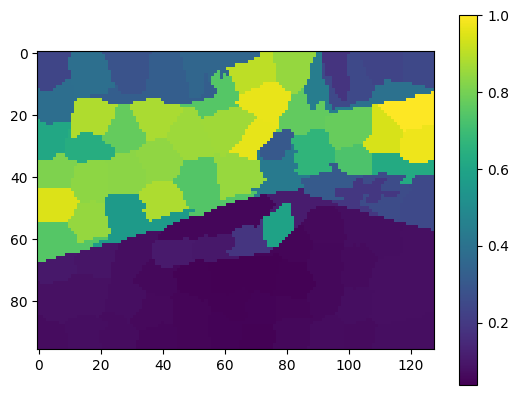

In [39]:
plt.imshow(ssd_image)
plt.colorbar()

In [40]:
ssd_image.max()

1.0

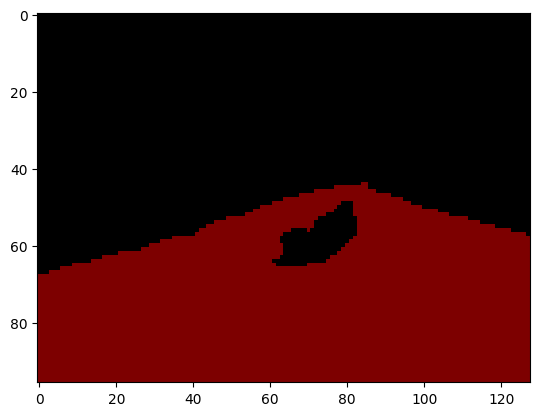

In [41]:
threshold = 0.15

mask = np.zeros((ssd_image.shape[0],ssd_image.shape[1],3),dtype='uint8')

mask[ssd_image<threshold]=np.array([125,0,0])



plt.imshow(mask)

In [42]:
result = cv2.addWeighted(rgb_small,0.9,mask,0.5,0.3)

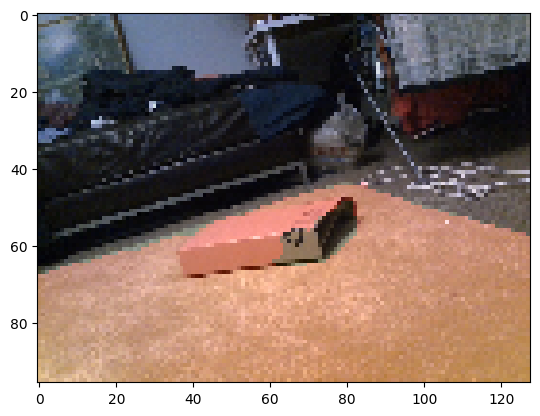

In [43]:
plt.imshow(result)